# EDA

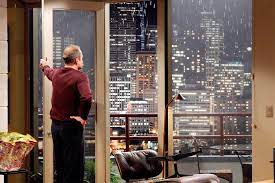

In [73]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt
from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [74]:
df_housing=pd.read_csv('data/eda.csv')

In [75]:
df_housing.shape

(21597, 23)

In [76]:
df_housing.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1
count,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,19206.000,21534.000,21597.000,21597.000,...,21597.000,17749.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000,21597.000
mean,4580474287.771,3.373,2.116,2080.322,15099.409,1.494,0.008,0.234,3.410,7.658,...,1971.000,836.651,98077.952,47.560,-122.214,1986.620,12758.284,540296.574,4580474287.771,10799.000
std,2876735715.748,0.926,0.769,918.106,41412.637,0.540,0.087,0.766,0.651,1.173,...,29.375,4000.111,53.513,0.139,0.141,685.230,27274.442,367368.140,2876735715.748,6234.661
min,1000102.000,1.000,0.500,370.000,520.000,1.000,0.000,0.000,1.000,3.000,...,1900.000,0.000,98001.000,47.156,-122.519,399.000,651.000,78000.000,1000102.000,1.000
25%,2123049175.000,3.000,1.750,1430.000,5040.000,1.000,0.000,0.000,3.000,7.000,...,1951.000,0.000,98033.000,47.471,-122.328,1490.000,5100.000,322000.000,2123049175.000,5400.000
50%,3904930410.000,3.000,2.250,1910.000,7618.000,1.500,0.000,0.000,3.000,7.000,...,1975.000,0.000,98065.000,47.572,-122.231,1840.000,7620.000,450000.000,3904930410.000,10799.000
75%,7308900490.000,4.000,2.500,2550.000,10685.000,2.000,0.000,0.000,4.000,8.000,...,1997.000,0.000,98118.000,47.678,-122.125,2360.000,10083.000,645000.000,7308900490.000,16198.000
max,9900000190.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,...,2015.000,20150.000,98199.000,47.778,-121.315,6210.000,871200.000,7700000.000,9900000190.000,21597.000


Steakholder:

| Charles Christensen | Seller      | Invest with big returns, wondering about renovation?, which Neighborhood? Timing?    

Q: is it smart to sell a house in king county?

Hypothesis: There is a profit margin between buy and sell of houses in king county.
Hypothesis: there is a difference in profit margin between regions
Hypothesis: There is a difference in profit due to neighboring houses

Q:are renovations a good thing for increasing the profit margin?

Hypothesis: Houses that are renovated return a higher profit margin  then unrenovated houses
Hypothesis: Houses that are renovated have a higher grade than unrenovated houses
Hypothesis: The additional profit margin of renovated houses is significant 

Q: is it a good time to sell?

Hypothesis: There is a market timing scheme in profit margins of comparable houses.
->When are the prices lowest/highest
->Is there a periodicity , which? -> FFT

Q: What type of house gives the highest profit margin?

Hypothesis: There is a difference in profit margin between houses of different grades
Hypothesis: There is a increase in profit margin of houses by year of construction
Hypothesis: The price per sqft is not linear across size of houses, there is a maximum


Possible advices: In which region to arbitrage

What is the added profit of renovation, is it actually increasing the profit

At which time to buy and sell might give potentially higher profits.

In [77]:
df_housing.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

In [78]:
df_housing[(df_housing.yr_renovated==0)|(df_housing.yr_renovated.isna())|(df_housing.yr_renovated.isnull())].yr_renovated=np.NaN
df_housing['yr_renovated'].dropna(inplace=True)

df_housing.yr_renovated[df_housing.yr_renovated==0]=np.NaN
df_housing['yr_renovated'].dropna(inplace=True)
#df_housing['yr_renovated']=df_housing.yr_renovated.is
#df_housing['yr_renovated']
df_housing['yr_renovated']=df_housing['yr_renovated'].map(lambda x: round(x)/10 if pd.notna(x) else np.NaN)
df_housing['yr_renovated'].min()

df_housing['yr_renovated']=pd.to_datetime(df_housing['yr_renovated'],format='%Y',errors='coerce')
#
#show the minimum igrnoring nan values of df_housing['yr_renovated']
#df_housing['yr_renovated'].head(50)
#pd.to_datetime(1934.00001,format='%Y',errors='coerce')
df_housing['price_sqft']=df_housing['price']/df_housing['sqft_living']
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  int64         
 13  yr_renovated   744 non-null    datetime64[ns]
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [79]:
df_housing['yr_built']
df_housing['yr_built']=pd.to_datetime(df_housing['yr_built'],format='%Y',errors='coerce')

In [80]:
df_housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   bedrooms       21597 non-null  float64       
 2   bathrooms      21597 non-null  float64       
 3   sqft_living    21597 non-null  float64       
 4   sqft_lot       21597 non-null  float64       
 5   floors         21597 non-null  float64       
 6   waterfront     19206 non-null  float64       
 7   view           21534 non-null  float64       
 8   condition      21597 non-null  int64         
 9   grade          21597 non-null  int64         
 10  sqft_above     21597 non-null  float64       
 11  sqft_basement  21145 non-null  float64       
 12  yr_built       21597 non-null  datetime64[ns]
 13  yr_renovated   744 non-null    datetime64[ns]
 14  zipcode        21597 non-null  int64         
 15  lat            2159

In [81]:
df_housing['date']
df_housing['date'] = pd.to_datetime(df_housing['date'],format='%Y-%m-%d',errors='coerce')
df_housing['date'] 

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [82]:
df_housing['dayofweek']= df_housing['date'].dt.dayofweek

In [83]:
import geopandas as gpd




In [84]:
import plotly.express as px

In [85]:
fig=px.scatter_mapbox(df_housing,
                      lat='lat',
                      lon='long',
                      color='price',
                      size_max=15,zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0.5,"t":0.5,"l":0.5,"b":0.5})
fig.show()

In [86]:
#df_grp=df_housing.groupby('house_id')['price'].diff().rename('price_diff')
#df_grp=df_housing[['house_id','lat','long','price']].join(df_grp)
#df_grp.reset_index(drop=True,inplace=True)

#df_grp['perc_profit'] = df_grp['price_diff']/df_grp['price']
#df_grp.dropna(inplace=True)
#df_grp.sort_values('perc_profit',ascending=False,inplace=True)
#df_grp.head(15)

agg_meth={'date':'diff','price':'diff','condition':'diff','price_sqft':'diff','grade':'diff'}
rnnms={'price':'price_diff','date':'time_diff','condition':'condition_diff','price_sqft':'price_sqft_diff','grade':'grade_diff'}
df_grp=df_housing.groupby('house_id').agg(agg_meth)#.rename(rnnms,inplace=True)
df_grp.rename(columns=rnnms,inplace=True)
df_grp.describe()
df_grp=df_housing[['house_id','lat','long','price','price_sqft']].join(df_grp)
df_grp.reset_index(drop=True,inplace=True)

df_grp['perc_profit'] = df_grp['price_diff']/df_grp['price']
df_grp['time_diff_D']=df_grp['time_diff'].apply(lambda x: x.days)
df_grp['perc_profit_time']=df_grp['perc_profit']/(df_grp['time_diff_D'])
df_grp['profit_sqft_time']=df_grp['price_sqft_diff']/df_grp['time_diff_D']
df_grp.dropna(inplace=True)
df_grp.sort_values('perc_profit_time',ascending=False,inplace=True)


idlist= df_grp.house_id[0:51]
idlist

10243    2422049104
12366    7899800045
17053    8651402750
15455    4202400078
15797    7129304540
9008     3739500096
11575    8807810890
6897     5249801440
8622     5127001320
8907     7977201065
3875     4364700600
13680     937000330
8268     3883800011
18689    3558900590
5719     1788800630
9106     1568100300
5268     4204400098
14980    4222310010
7239     1446403850
6784     8651510380
10211    3293700496
2492     9407110710
12197    4031000520
8119     2787460720
14354    3333002450
8334     4154300296
10309    6623400187
7172      526059224
5690     3578401060
7841     2621600015
13616    2023049218
3753     1254200015
9112     1922059278
15143    6669020290
5247     7524400250
11447    4305200070
2501     1781500435
15555    2560801222
5240     3303000130
1863     2143700830
13647    3432501415
3782      723049156
8497     1237500540
12327    5132000140
16658    9250900104
12943    2019200220
11050    6141100320
17120    6143000020
19537     643300040
94       6021501535


In [87]:
fig=px.scatter_mapbox(df_grp,
                      lat='lat',
                      lon='long',
                      color='perc_profit_time',
                      size_max=25,zoom=8,
                      color_continuous_scale=px.colors.sequential.Bluered)
fig.update_traces(marker=dict(size=10))
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0.5,"t":0.5,"l":0.5,"b":0.5})
fig.update_layout(title="resale price increase in permille/day")
fig.update_layout(coloraxis_colorbar=dict(title="relative price increase per day"))
fig.show()
fig.write_image("resale_price_increase.png")

In [88]:
top_profits=df_housing[df_housing['house_id'].isin(idlist)]
top_profits.describe()

top_profits_margin=df_grp[:][0:51].copy()
#top_profits_margin.head()
top_profits.describe()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,price,house_id,id.1,price_sqft,dayofweek
count,102.000,102.000,102.000,102.000,102.000,102.000,82.000,102.000,102.000,102.000,...,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000,102.000
mean,4267588609.569,3.255,1.632,1534.706,8759.078,1.167,0.000,0.039,3.255,6.745,...,98084.333,47.538,-122.252,1570.235,8420.863,317316.039,4267588609.569,9927.696,212.617,1.784
std,2523452346.517,1.050,0.630,503.573,3279.045,0.325,0.000,0.279,0.740,0.767,...,56.959,0.144,0.112,367.458,2634.460,161477.958,2523452346.517,4668.575,104.406,1.325
min,526059224.000,1.000,1.000,790.000,4590.000,1.000,0.000,0.000,1.000,5.000,...,98001.000,47.273,-122.388,810.000,4500.000,82000.000,526059224.000,94.000,87.647,0.000
25%,2053212121.000,3.000,1.000,1155.000,7164.750,1.000,0.000,0.000,3.000,6.000,...,98032.500,47.423,-122.334,1325.000,6327.750,196125.000,2053212121.000,6813.000,141.402,1.000
50%,3883800011.000,3.000,1.750,1520.000,8148.000,1.000,0.000,0.000,3.000,7.000,...,98074.000,47.524,-122.284,1540.000,8359.000,268475.000,3883800011.000,9112.500,194.559,2.000
75%,6142525095.000,3.750,2.000,1830.000,9654.000,1.000,0.000,0.000,4.000,7.000,...,98131.250,47.680,-122.199,1820.000,9522.000,412500.000,6142525095.000,13639.500,259.634,3.000
max,9407110710.000,6.000,4.500,3500.000,21303.000,2.000,0.000,2.000,5.000,8.000,...,98198.000,47.774,-121.771,2570.000,17920.000,740000.000,9407110710.000,19538.000,576.471,5.000


3 Bedrooms, 1 Bathroom, 1 Floor, No Waterfront, No View, Condition 3, Grade 6 or 7, min 5, sqftabove 1200 (915-1405), mostly no basement, sqft living 1490,1497 (1265-1680),sft lot 7454 7680  (5235-9149), price mean (333957), median(261500), 188737-455500

In [105]:
top_profits.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,price_sqft,dayofweek
93,6021501535,3.000,1.500,1580.000,5000.000,1.000,0.000,0.000,3,8,...,47.687,-122.386,1570.000,4500.000,2014-07-25,430000.000,6021501535,94,272.152,4
94,6021501535,3.000,1.500,1580.000,5000.000,1.000,0.000,0.000,3,8,...,47.687,-122.386,1570.000,4500.000,2014-12-23,700000.000,6021501535,95,443.038,1
1862,2143700830,4.000,2.500,2100.000,19680.000,1.500,0.000,0.000,3,6,...,47.479,-122.230,1340.000,12300.000,2014-10-06,207000.000,2143700830,1863,98.571,0
1863,2143700830,4.000,2.500,2100.000,19680.000,1.500,0.000,0.000,3,6,...,47.479,-122.230,1340.000,12300.000,2015-03-12,370000.000,2143700830,1864,176.190,3
2491,9407110710,3.000,1.750,1510.000,8400.000,1.000,0.000,0.000,2,7,...,47.448,-121.771,1500.000,10125.000,2014-11-07,195000.000,9407110710,2492,129.139,4


In [89]:
fig=px.scatter_mapbox(top_profits_margin,
                      lat='lat',
                      lon='long',
                      color='perc_profit_time',
                      #symbol='grade',
                      size_max=25,zoom=8,
                      color_continuous_scale=px.colors.sequential.Bluered,
                      opacity=0.7)
fig.update_traces(marker_size=12)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0.5,"t":0.5,"l":0.5,"b":0.5})
fig.update_layout(coloraxis_showscale=True)
fig.update_layout(title="top 50 price increase per day")
fig.update_layout(coloraxis_colorbar=dict(title="relative price increase per day"))

fig.show()
fig.write_image('map_of_top_profits.png')

<AxesSubplot:xlabel='date', ylabel='price_sqft'>

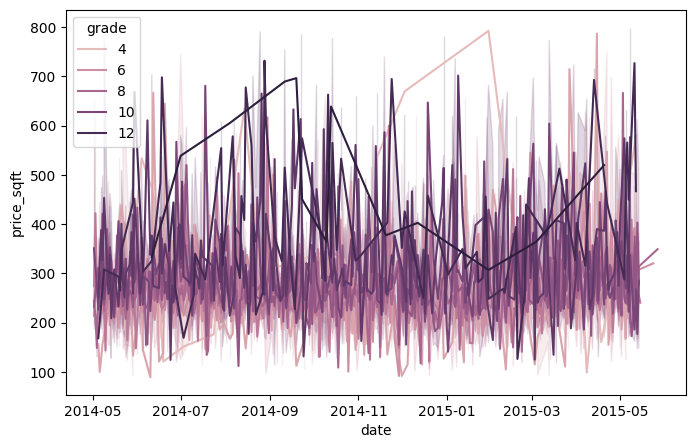

In [90]:
sns.lineplot(data=df_housing, x="date", y="price_sqft", hue="grade")

<AxesSubplot:ylabel='date'>

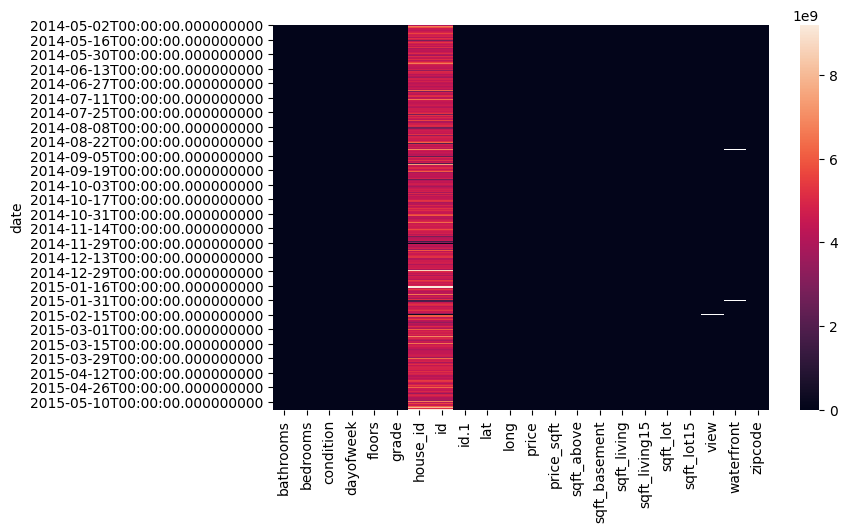

In [91]:
#sns.heatmap(df_housing)



pivot_table=pd.pivot_table(df_housing, index='date')
sns.heatmap(pivot_table)

Text(0, 0.5, 'price per sq. ft. ($/ft^2)')

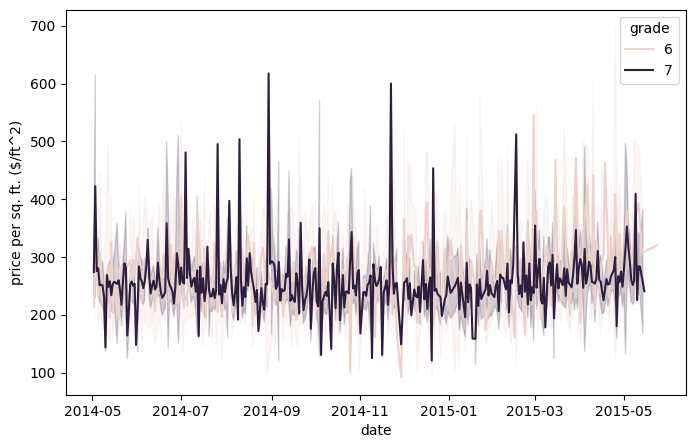

In [92]:
pl=sns.lineplot(data=df_housing[(df_housing.grade==7)|(  df_housing.grade==6)].sort_values(by="date"), 
             x="date", y="price_sqft", hue="grade",
             #style="grade",
             
             )
pl.set_ylabel("price per sq. ft. ($/ft^2)")


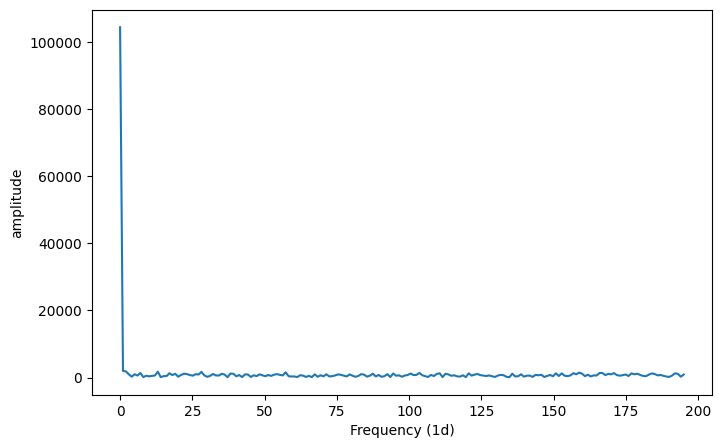

In [93]:
# do a fft of the df_housing
from scipy.fftpack import fft
dat=df_housing.copy()
dat=dat.set_index('date').resample('D').mean().interpolate()
fft_data=fft(dat['price_sqft'].values)
freq=np.linspace(0,len(dat) // 2 , len(fft_data) // 2)


plt.plot(freq, abs(fft_data[:len(fft_data) // 2]))
plt.xlabel('Frequency (1d)')
plt.ylabel('amplitude')
plt.show()

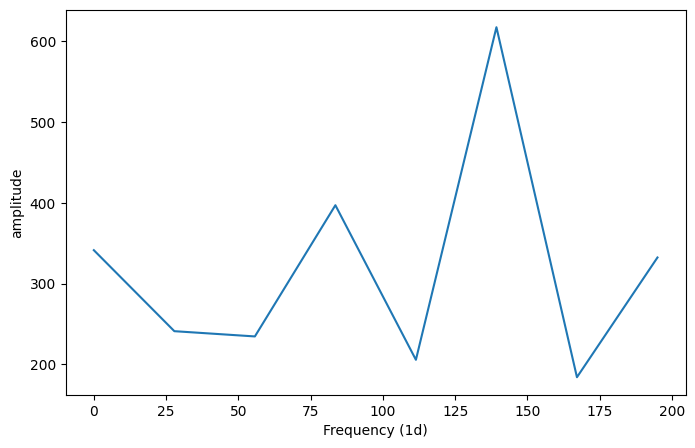

In [94]:
# do a fft of the df_housing
from scipy.fftpack import fft
dat=df_housing.copy()
dat=dat.set_index('date').resample('D').mean().interpolate()
fft_data=fft(dat.loc[(dat['grade']==7) | (dat['grade']==6) ,['price_sqft']].values)
freq=np.linspace(0,len(dat) // 2 , len(fft_data) // 2)


plt.plot(freq, abs(fft_data[:len(fft_data) // 2]))
plt.xlabel('Frequency (1d)')
plt.ylabel('amplitude')
plt.show()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,price_sqft,dayofweek
77,2391600320,3.000,1.000,1040.000,5060.000,1.000,0.000,0.000,3,7,...,47.564,-122.394,890.000,5060.000,2015-04-20,480000.000,2391600320,78,461.538,0
111,3362400511,3.000,1.750,1260.000,3328.000,1.000,0.000,0.000,5,6,...,47.682,-122.349,1380.000,3536.000,2015-03-04,570000.000,3362400511,112,452.381,2
122,3626039187,2.000,1.000,770.000,6000.000,1.000,0.000,0.000,3,6,...,47.700,-122.364,1710.000,6000.000,2015-04-06,395000.000,3626039187,123,512.987,0
140,4232901525,2.000,1.000,1110.000,3200.000,1.000,0.000,0.000,3,7,...,47.634,-122.358,1170.000,3600.000,2014-06-27,665000.000,4232901525,141,599.099,4
151,1324300398,3.000,1.000,1110.000,5000.000,1.500,0.000,0.000,3,7,...,47.655,-122.359,1420.000,5000.000,2015-04-09,560000.000,1324300398,152,504.505,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21027,9276200220,1.000,1.000,720.000,3166.000,1.000,0.000,0.000,3,6,...,47.581,-122.389,1140.000,6250.000,2014-07-17,375000.000,9276200220,21028,520.833,3
21310,6003000851,1.000,1.000,550.000,1279.000,2.000,0.000,0.000,3,7,...,47.616,-122.314,1460.000,1385.000,2014-05-22,353000.000,6003000851,21311,641.818,3
21316,9266700190,1.000,1.000,390.000,2000.000,1.000,0.000,0.000,4,6,...,47.694,-122.347,1340.000,5100.000,2015-05-11,245000.000,9266700190,21317,628.205,0
21319,5100400244,2.000,1.000,894.000,1552.000,2.000,0.000,0.000,3,7,...,47.691,-122.313,1131.000,1992.000,2015-04-20,403000.000,5100400244,21320,450.783,0


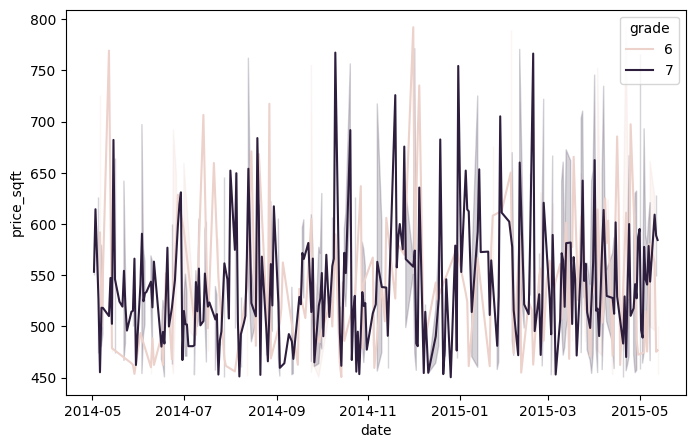

In [95]:
sns.lineplot(data=df_housing[(df_housing.price_sqft >450) &((df_housing.grade==7)|(  df_housing.grade==6))], x="date", y="price_sqft", hue="grade")

df_housing[(df_housing.price_sqft >450) &((df_housing.grade==7)|(  df_housing.grade==6))]

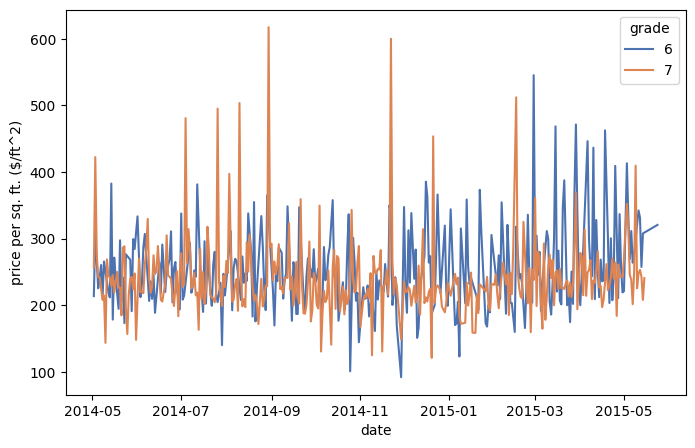

In [115]:
pl=sns.lineplot(data=df_housing[(df_housing.grade==7)|(  df_housing.grade==6)].groupby(['date','grade']).median(), 
             x="date", y="price_sqft", hue="grade",
             palette='deep')
           
pl.set_ylabel("price per sq. ft. ($/ft^2)")
plt.savefig("housing_price_per_sqft.png",dpi=300)

In [96]:
data=df_housing[(df_housing.price_sqft >450) &(df_housing.grade==7)|(  df_housing.grade==6)]

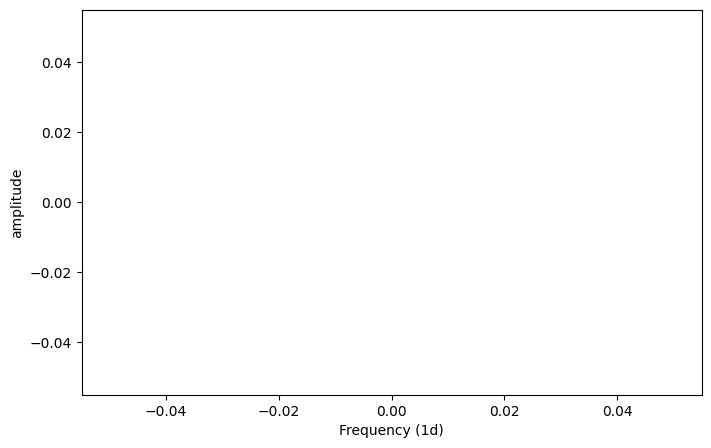

In [97]:
dat=df_housing.copy()
dat=dat.set_index('date').resample('D').mean().interpolate()
fft_data=fft(dat.loc[(dat['price_sqft']>450)&((dat['grade']==7) | (dat['grade']==6)) ,['price_sqft']].values)
freq=np.linspace(0,len(dat) // 2 , len(fft_data) // 2)


plt.plot(freq, abs(fft_data[:len(fft_data) // 2]))
plt.xlabel('Frequency (1d)')
plt.ylabel('amplitude')
plt.show()

In [98]:
df_g=df_housing[(df_housing.price_sqft >450) 
           &((df_housing.grade==7)|
             (  df_housing.grade==6))].groupby('dayofweek').max()

df_g

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,id.1,price_sqft
dayofweek,,,,,,,,,,,,,,,,,,,,,
0,9828700900,4.000,3.000,2190.000,91476.000,2.000,1.000,4.000,5,7,...,98199,47.721,-122.139,3200.000,115434.000,2015-05-11,1200000.000,9828700900,21320,792.105
1,9834200390,4.000,2.750,2970.000,403365.000,2.000,1.000,4.000,5,7,...,98199,47.747,-121.890,3430.000,108900.000,2015-05-12,1570000.000,9834200390,21568,810.139
2,9834201205,5.000,2.750,2310.000,115434.000,2.000,1.000,4.000,5,7,...,98199,47.735,-121.870,3360.000,25346.000,2015-05-13,1150000.000,9834201205,20078,791.667
3,9828702095,5.000,3.250,3580.000,78408.000,2.000,1.000,4.000,5,7,...,98199,47.760,-122.038,3320.000,64468.000,2015-05-07,2050000.000,9828702095,21311,766.393
4,9828701747,6.000,4.000,2070.000,1651359.000,3.000,1.000,4.000,5,7,...,98199,47.734,-122.023,3040.000,425581.000,2015-05-08,1350000.000,9828701747,19524,767.327
5,9828200762,4.000,2.500,2750.000,20000.000,1.500,1.000,4.000,5,7,...,98122,47.701,-122.068,3050.000,11775.000,2015-05-02,1650000.000,9828200762,19603,697.368
6,9297301520,4.000,2.500,1430.000,6180.000,1.500,0.000,2.000,4,7,...,98155,47.752,-122.279,2000.000,5965.000,2015-05-03,720001.000,9297301520,19156,630.952


<AxesSubplot:xlabel='grade', ylabel='price_sqft'>

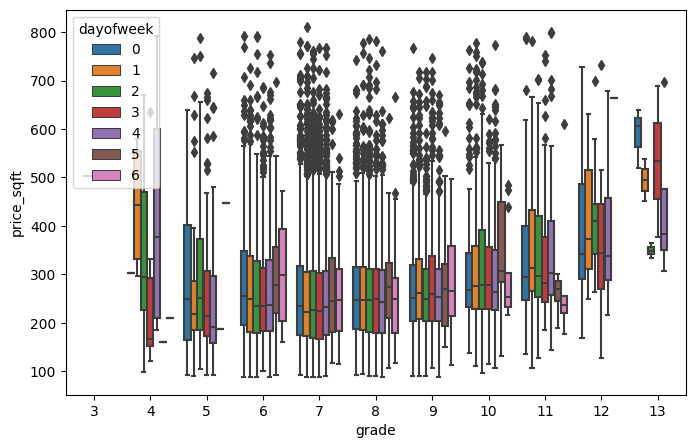

In [99]:
sns.boxplot(data=df_housing, x="grade", y="price_sqft", hue="dayofweek")

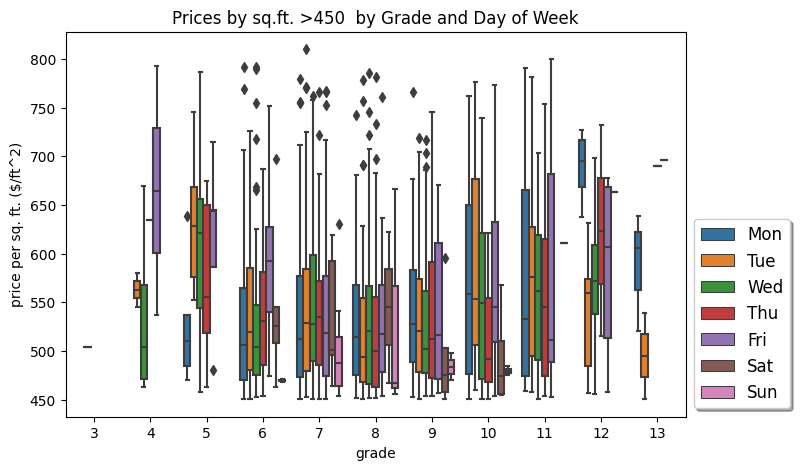

In [109]:
ax=sns.boxplot(data=df_housing[df_housing['price_sqft']>450], x="grade", y="price_sqft", hue="dayofweek")
#ax.legend(loc='lower center',orientation='vertical')

ax.legend(loc='lower left',
      #   bbox_to_anchor=(0.5, -0.05),
      bbox_to_anchor=(1.0, 0),
#ncol=7,
fancybox=True,shadow=True,fontsize=12)


weekDays = ["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]
for t, l in zip(ax.legend_.texts, weekDays): t.set_text(l)

plt.title("Prices by sq.ft. >450  by Grade and Day of Week")
plt.xlabel("grade")
plt.ylabel("price per sq. ft. ($/ft^2)")

#plt.show()
#plt.resize
plt.savefig("pricbysqftbyday.png",dpi=300,bbox_inches = "tight")
plt.show()

In [101]:
agg_meth={'date':'diff','price':'diff','condition':'diff','price_sqft':'diff','grade':'diff'}
rnnms={'price':'price_diff','date':'time_diff','condition':'condition_diff','price_sqft':'price_sqft_diff','grade':'grade_diff'}
df_grp=df_housing.groupby('house_id').agg(agg_meth)#.rename(rnnms,inplace=True)
df_grp.rename(columns=rnnms,inplace=True)
df_grp.describe()
df_grp=df_housing[['house_id','lat','long','price','price_sqft']].join(df_grp)
df_grp.reset_index(drop=True,inplace=True)

df_grp['perc_profit'] = df_grp['price_diff']/df_grp['price']
df_grp['time_diff_D']=df_grp['time_diff'].apply(lambda x: x.days)
df_grp['perc_profit_time']=df_grp['perc_profit']/(df_grp['time_diff_D'])
df_grp['profit_sqft_time']=df_grp['price_sqft_diff']/df_grp['time_diff_D']
df_grp.dropna(inplace=True)
df_grp.sort_values('perc_profit_time',ascending=False,inplace=True)
df_grp.head(50)

,house_id,lat,long,price,price_sqft,time_diff,price_diff,condition_diff,price_sqft_diff,grade_diff,perc_profit,time_diff_D,perc_profit_time,profit_sqft_time
10243,2422049104,47.381,-122.243,235000.000,283.133,106 days,150000.000,0.000,180.723,0.000,0.638,106.000,0.006,1.705
12366,7899800045,47.524,-122.356,232900.000,255.934,96 days,125900.000,0.000,138.352,0.000,0.541,96.000,0.006,1.441
17053,8651402750,47.361,-122.087,219950.000,181.777,71 days,87125.000,0.000,72.004,0.000,0.396,71.000,0.006,1.014
15455,4202400078,47.491,-122.223,335000.000,237.589,90 days,160000.000,0.000,113.475,0.000,0.478,90.000,0.005,1.261
15797,7129304540,47.519,-122.266,440000.000,307.692,145 days,307000.000,0.000,214.685,0.000,0.698,145.000,0.005,1.481
9008,3739500096,47.737,-122.307,430000.000,279.221,99 days,201000.000,0.000,130.519,0.000,0.467,99.000,0.005,1.318
11575,8807810890,47.663,-122.059,385000.000,308.000,70 days,125125.000,0.000,100.100,0.000,0.325,70.000,0.005,1.430
6897,5249801440,47.558,-122.277,570000.000,343.373,127 days,320000.000,0.000,192.771,0.000,0.561,127.000,0.004,1.518
8622,5127001320,47.473,-122.149,314950.000,207.204,90 days,124950.000,0.000,82.204,0.000,0.397,90.000,0.004,0.913
8907,7977201065,47.684,-122.293,740000.000,536.232,121 days,390000.000,0.000,282.609,0.000,0.527,121.000,0.004,2.336


In [102]:
df_housing['isnotrenovated']=df_housing['yr_renovated'].isna()

df_housing['renovated']=~df_housing['isnotrenovated']

df_housing[['isnotrenovated','yr_renovated','renovated']].head(50)
agg_meth={'price':'median','price_sqft':'median','sqft_lot':'median','sqft_living':'median'}
rnnms={'price':'price_med','date':'time_med','price_sqft':'price_sqft_med'}
df_grp=df_housing.groupby(['grade','renovated','condition']).agg(agg_meth)#.rename(rnnms,inplace=True)
#df_grp=df_housing.groupby(['renovated','grade']).median()

df_grp.rename(columns=rnnms,inplace=True)
df_grp.head(30)
#df_grp=df_housing[['house_id','lat','long','price','price_sqft']].join(df_grp)
#df_grp.reset_index(drop=True,inplace=True)

#df_grp['perc_profit'] = df_grp['price_diff']/df_grp['price']
#df_grp['time_diff_D']=df_grp['time_diff'].apply(lambda x: x.days)
#df_grp['perc_profit_time']=df_grp['perc_profit']/(df_grp['time_diff_D'])
#df_grp['profit_sqft_time']=df_grp['price_sqft_diff']/df_grp['time_diff_D']
#df_grp.dropna(inplace=True)
#df_grp.sort_values('perc_profit_time',ascending=False,inplace=True)
#df_grp.head(50)

price_med  price_sqft_med   sqft_lot  sqft_living
grade renovated condition                                                   
3     False     5         262000.000         503.846  12981.000      520.000
4     False     1         150000.000         176.471  54000.000      850.000
                2         132500.000         244.065   9193.000      455.000
                3         196500.000         281.747   9560.000      710.000
                4         229050.000         322.078   8600.000      730.000
      True      4         330000.000         634.615   6862.000      520.000
5     False     1         190000.000         250.000   9975.000      780.000
                2         180000.000         220.395   6250.000      760.000
                3         241725.000         241.488   7200.000      836.500
                4         229975.000         214.286   7335.000      950.000
                5         227450.000         254.144   5868.000     1000.000
      True      3         208000.000         193.486   5220.000     1010.000
6     False     1         262500.000         236.616   8833.500     1110.000
                2         235000.000         219.786   7230.000      985.000
                3         264975.000         241.441   7097.500     1080.000
                4         295000.000         248.333   7370.000     1150.000
                5         286975.000         240.988   6870.000     1185.000
      True      1         252000.000         370.588   1638.000      680.000
                2         160000.000         132.231 103237.000     1210.000
                3         295500.000         215.789   6430.000     1240.000
                4         300100.000         204.461   8401.500     1350.000
                5         218500.000         181.621   7033.500     1150.000
7     False     1         403500.000         184.996   6250.000     1470.000
                2         305000.000         207.111   8575.000     1460.000
                3         353875.000         217.736   7139.500     1610.000
                4         389000.000         232.609   8100.000     1625.000
                5         456000.000         267.999   7200.000     1740.000
      True      2         250000.000         104.603  23522.000     2390.000
                3         458500.000         274.242   7000.000     1720.000
                4         476500.000         273.955   9527.000     1850.000

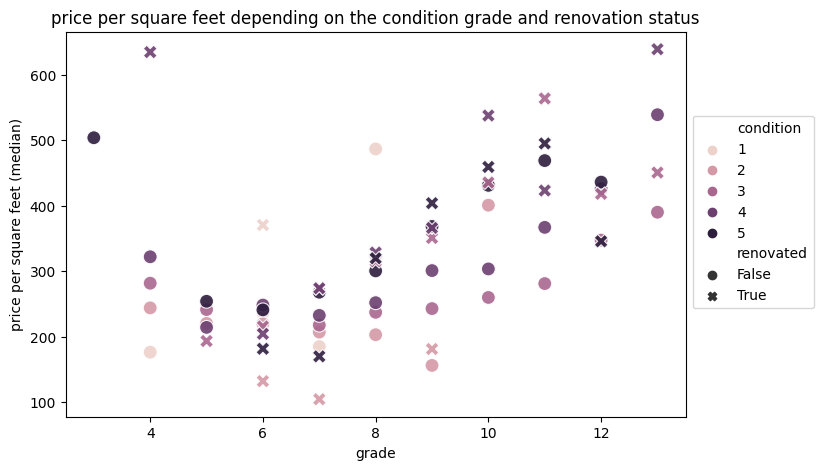

In [103]:
#sns.boxplot(data=df_grp,y='price_sqft_med')

#g=sns.FacetGrid(df_grp,row='price_sqft_med')
#g.map(sns.scatterplot,"grade","renovated")
plot=sns.scatterplot(y='price_sqft_med',x='grade',hue='condition',style='renovated',alpha=0.9,data=df_grp,
                     s=100,
                     sizes=(5,5))
#plot.legend(loc='upper center',bbox_to_anchor=(0.5, 1.1),fancybox=True,ncol=9)

plot.set_xlabel('grade')
plot.set_ylabel('price per square feet (median)')
plot.set_title('price per square feet depending on the condition grade and renovation status')

plot.legend(loc='best',bbox_to_anchor=(1.0, 0.8),fancybox=True,ncol=1)
plt.savefig('price_per_sqft_conditon.png',bbox_inches='tight',dpi=600)